# Drug Solubility Predictor 

## Import Libraries

In [2]:
import pandas as pd #pandas is a dataframes library 
import numpy as np #numpy provides n-dim object support
import matplotlib.pyplot as plt #plots data
import os
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
logisticRegr = LogisticRegression()

%matplotlib inline

In [3]:
# import training and test data sets
training_csv = pd.read_csv('C:/Users/joe/training_full_set.csv')
test_csv = pd.read_csv('C:/Users/joe/test_full_set.csv')

In [4]:
test_csv['Log_S'] = 111
#insert log s into test csv with values so it is not removed when concatenated

In [5]:
df = pd.concat((training_csv, test_csv),join='outer',axis=0, ignore_index=True) 
#concat the two data sets into one taking all columns from both data sets even if there is no value
#remove the columns that are present in one data set not the other,n.b. this includes log s so need to fix that later
df = df.dropna(axis=1, how='any')
df.shape

(106, 3753)

In [6]:
# setting colum to name, target column to Log S
# need to remove null colunms from data frame before doing this step?
ID_col = ['NAME']
target_col = ['Log_S']
num_cols= list(set(list(df.columns))-set(ID_col)-set(target_col))
x = df.loc[:,num_cols].values
y = df.loc[:,['Log_S']].values
# predicting solubility = y value, eerything else = x

In [7]:
df.isnull().values.any()

False

### at this point we have a data frame with training and test data with 
### matching columns and test data with arbitrary Log S values (111)

In [8]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#instance the function for unit variance scaling 
(scaler.fit(x))
scaled_x = (scaler.transform(x))
print(scaled_x)
# unit variance scalling on the data 

[[  0.29696646   0.09759001   0.         ...  -2.04982491  -0.13324272
    0.        ]
 [ -1.07949484   0.09759001   0.         ...   0.81898144   4.91094607
    0.        ]
 [ -1.30289956 -10.24695077   0.         ...   0.81898144  -0.13324272
    0.        ]
 ...
 [ -0.92815617   0.09759001   0.         ...  -0.99063288  -0.13324272
    0.        ]
 [  0.21048722   0.09759001   0.         ...  -0.47114284  -0.13324272
    0.        ]
 [  0.86628815   0.09759001   0.         ...   1.57069385  -0.13324272
    0.        ]]


In [9]:
# remove low variance data from the x data set 
rm_variance = VarianceThreshold()
variance_scaled_x = (rm_variance.fit_transform(scaled_x))
variance_scaled_x.shape

(106, 2211)

50

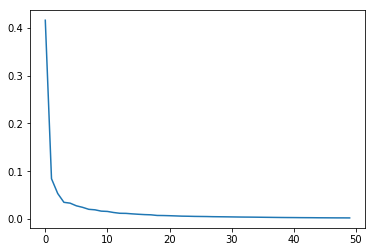

In [11]:
pca = PCA(0.95)
# could do PCA(0.9) or (n_components=)
principalcomponents = pca.fit_transform(variance_scaled_x)
#perfom pca on the x data set defined before as all values of the data frame except log s
principalDf = pd.DataFrame(data = principalcomponents)
#make a new data frame with the principal components 
plt.plot(pca.explained_variance_ratio_)
pca.n_components_

In [12]:
finalDf = pd.concat([principalDf, df[['Log_S']]], axis = 1)
#create a final data frame with the pc data frame and log s
finalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Log_S
0,46.910191,-3.727184,-14.008413,9.420127,5.546700,5.647128,0.949502,-9.375622,-4.248683,-1.900821,...,2.770246,0.749563,2.085875,-1.538424,1.300617,0.553772,0.165452,-1.052876,-2.746454,4.018380
1,51.393064,7.998942,6.477963,13.580215,4.507663,3.692471,9.105957,1.427779,3.988836,5.149498,...,6.565039,2.745897,-1.695614,-1.715112,4.859942,-1.539884,-0.474895,7.270967,3.774347,2.925669
2,76.028090,-8.061326,11.724416,28.394829,25.684290,10.996146,26.865209,27.511559,12.801814,-19.514367,...,-0.220173,-0.191760,0.249546,-0.640113,-0.561178,0.288803,0.133488,-0.239836,-0.833906,4.285827
3,45.527367,13.763500,7.411321,17.016368,1.557770,1.278738,11.749037,-2.965313,3.718973,7.318301,...,-3.621417,0.901082,-4.529994,6.901458,0.460375,2.995382,-0.339750,-2.896223,-3.708546,3.379708
4,49.397355,-5.715870,12.375486,7.393553,-2.145998,-2.170914,-2.071853,-0.976115,-0.689757,0.332150,...,5.017396,-4.201899,-0.182921,2.638860,0.965781,-4.214924,-0.663757,4.542896,0.718003,4.936160


In [13]:
finalDf.tail()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Log_S
101,8.943817,17.159376,0.885773,-13.521457,8.917472,5.518848,-1.341905,1.404028,-5.036560,-4.743340,...,1.202328,0.127022,5.021704,1.367421,-1.990583,0.401825,1.423931,3.544814,-0.460016,111.0
102,-73.741619,-21.998663,4.639965,4.350236,2.699055,12.187477,21.220140,-15.608070,-0.524662,0.984759,...,-5.627841,-1.406555,-3.107369,-1.808877,-2.323556,2.503088,-1.439403,1.190296,1.331872,111.0
103,25.834991,1.165492,-16.230107,-2.696917,15.871886,0.793610,-15.065185,-0.316810,-2.417031,-9.694868,...,-7.615614,3.741961,2.413137,5.239326,0.709498,-0.283868,1.906517,2.629007,1.315659,111.0
104,3.076549,4.569885,10.088122,-14.719860,-6.540791,1.907303,6.123158,1.200148,-3.525809,1.665112,...,0.181665,-1.146627,-0.237087,-2.245906,2.412937,1.065233,-0.972894,0.801709,-1.092182,111.0
105,-35.738936,-11.380707,2.062392,4.267574,8.305520,0.300280,-8.302934,5.802272,4.655866,6.908935,...,8.491050,4.281045,-0.732674,-0.608645,3.851596,-1.804798,6.132730,-2.907824,-1.203048,111.0


In [14]:
# seperate out the data frame into training and test again. currently have n number of records with log s =111
# need to seperate them into training and test again to generate model 
test_final_df = finalDf[finalDf.Log_S == 111]
train_final_df = finalDf[finalDf.Log_S < 111]
train_final_df.shape

(74, 51)

In [15]:
# create values for an array to use as input for logistic regression function
ID_col = ['NAME']
target_col = ['Log_S']
num_cols= list(set(list(train_final_df.columns))-set(ID_col)-set(target_col))
train_x = train_final_df.loc[:,num_cols].values
train_y = train_final_df.loc[:,['Log_S']].values
### and for test data
ID_col = ['NAME']
target_col = ['Log_S']
num_cols= list(set(list(test_final_df.columns))-set(ID_col)-set(target_col))
test_x = test_final_df.loc[:,num_cols].values
test_y = test_final_df.loc[:,['Log_S']].values

## Data Prepared 

In [16]:
# make an instance of the model 
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [17]:
new_y = train_y.ravel()
train_y = np.array(new_y).astype(int)
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
logisticRegr.predict(test_x[0:10])

array([2, 2, 1, 4, 0, 3, 0, 1, 2, 3])

In [19]:
logisticRegr.score(test_x, test_y)

0.0

In [21]:
# complete new approach just trying to do logistic regression on training
# data, with y as log s and x as everything else (exceot the null columns
# so using the data from post concatination but after being split and before 
# being scaled and variance 
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)